In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import ndarray

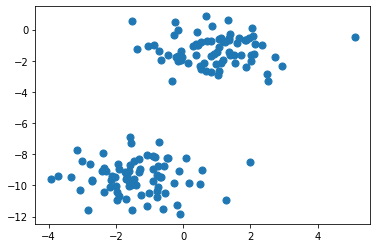

In [2]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(150, 2, centers=2, random_state=2, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='RdBu');

In [3]:
def initialize_random_centroids(data: ndarray, amount: int) -> ndarray:
        n_dims = data.shape[1]
        centroid_min = data.min()
        centroid_max = data.max()
        centroids = []
        for centroid in range(amount):
            centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
            centroids.append(centroid)

        return np.array(centroids)

In [45]:
 def assign_centroid(data: ndarray, centroids: ndarray):
        centroid_assign = []
        centroid_errors = []

        for el in data:
            errors = []
            for centroid in centroids:
                error = root_sse(el, centroid)
                errors.append(error)
            
            closest_centroid_error = np.amin(errors)
            try:
                closest_centroid = np.where(errors==closest_centroid_error)[0][0]
            except IndexError:
                closest_centroid = None
            
            centroid_assign.append(closest_centroid)
            centroid_errors.append(closest_centroid_error)

        return centroid_assign, centroid_errors

In [5]:
def c_i(x_i, u_j) -> float:
    squared_sum = 0
    for x, j in zip(x_i, u_j):
        squared_sum += (x - j) ** 2
    return np.sqrt(squared_sum)

In [22]:
def recalculate_centroid(data: ndarray, centroids: ndarray, centroids_assigned):
    new_centroids = []
    for ci, centroid in enumerate(centroids):
        new_centroid = np.sum(data[centroids_assigned==ci], axis=0)/len(centroids_assigned[centroids_assigned==ci])
        new_centroids.append(new_centroid)
    return new_centroids

In [9]:
def root_sse(x, centroid) -> float:
    squared_sum = 0
    for xi, ci in zip(x, centroid):
        squared_sum += (xi - ci) ** 2
    return np.sqrt(squared_sum)

In [7]:
def fit_transform(data: ndarray):
        centroids = initialize_random_centroids(data, k)
        error = []
        i = 0

        while True:
            assigned_centroids, iter_error = assign_centroid(data, centroids)
            error.append(sum(iter_error))
            
            centroids = recalculate_centroid(data, centroids, np.array(assigned_centroids))

            # Re initialize centroids
            if len(centroids) < k:
                print("Cluster devanished! Consider reducing the number of k")
                number_centroids_to_reinitialize = k - len(centroids)
                reinitialized_centroids = initialize_random_centroids(
                    data,
                    number_centroids_to_reinitialize
                )

                centroids.append(reinitialized_centroids)

            if (len(error) >= 2) & (round(error[i], 3) == round(error[i - 1], 3)):
                break

            i = i + 1

        return assigned_centroids, iter_error, centroids


In [ ]:
k = 3
assigned_centroids, iter_error, centroids = fit_transform(X)

In [40]:
(assigned_centroids == Y)

array([False,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False, False, False,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
        True, False,

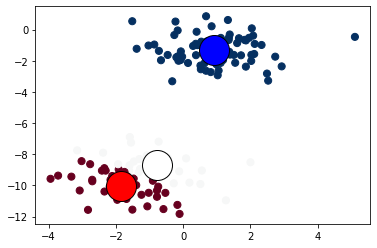

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=assigned_centroids, s=50, cmap='RdBu');
plt.plot(centroids[0][0], centroids[0][1], marker="o", markersize=30, markeredgecolor="black", markerfacecolor="red")
plt.plot(centroids[1][0], centroids[1][1], marker="o", markersize=30, markeredgecolor="black", markerfacecolor="white")
plt.plot(centroids[2][0], centroids[2][1], marker="o", markersize=30, markeredgecolor="black", markerfacecolor="blue")